In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam # - Works
from tensorflow.keras.optimizers import Adam # - Works

import tensorflow as tf                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

import cv2
import os

import numpy as np

In [5]:
import pickle

In [11]:
labels = ['yes', 'no']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_data('train_valid_mri')
val = get_data('test_valid_mri')

/tmp/ipykernel_271438/232597395.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


/home/local/ZOHOCORP/selva-pt5595/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

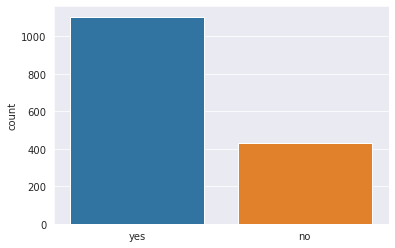

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("yes")
    else :
        l.append("no")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'yes')

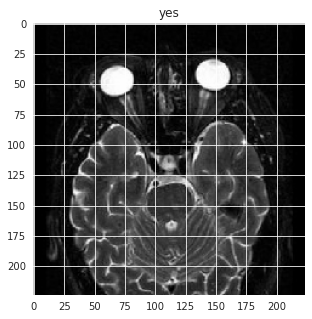

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'no')

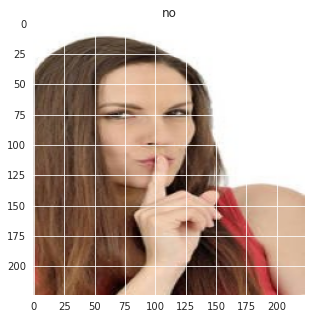

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [8]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

2022-11-20 22:42:56.294919: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/local/ZOHOCORP/selva-pt5595/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-20 22:42:56.294944: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-20 22:42:56.294962: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (selva-pt5595): /proc/driver/nvidia/version does not exist
2022-11-20 22:42:56.295191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, 

In [9]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [10]:
history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))

Epoch 1/50


/home/local/ZOHOCORP/selva-pt5595/anaconda3/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


48/48 [==============================] - 22s 440ms/step - loss: 0.1236 - accuracy: 0.9628 - val_loss: 0.0178 - val_accuracy: 0.9921
Epoch 2/50
48/48 [==============================] - 19s 402ms/step - loss: 0.0144 - accuracy: 0.9948 - val_loss: 0.0203 - val_accuracy: 0.9921
Epoch 3/50
48/48 [==============================] - 21s 429ms/step - loss: 0.0087 - accuracy: 0.9954 - val_loss: 0.0576 - val_accuracy: 0.9784
Epoch 4/50
48/48 [==============================] - 19s 401ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0133 - val_accuracy: 0.9941
Epoch 5/50
48/48 [==============================] - 20s 426ms/step - loss: 0.0044 - accuracy: 0.9974 - val_loss: 0.0079 - val_accuracy: 0.9980
Epoch 6/50
48/48 [==============================] - 20s 424ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0282 - val_accuracy: 0.9902
Epoch 7/50
48/48 [==============================] - 20s 426ms/step - loss: 0.0013 - accuracy: 0.9993 - val_loss: 0.0101 - val_accuracy: 0.9961
Epoch 8/50

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [12]:
model.save("final_model_valid_mri_1")

INFO:tensorflow:Assets written to: final_model_valid_mri_1/assets


INFO:tensorflow:Assets written to: final_model_valid_mri_1/assets


In [36]:
filename = 'final_model.sav'

In [37]:
pickle.dump(model, open(filename, 'wb'))

2022-11-20 13:23:13.928371: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://0d8b999e-d003-452d-8cb0-0404e5bffb56/assets


In [18]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.summary()
history = loaded_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

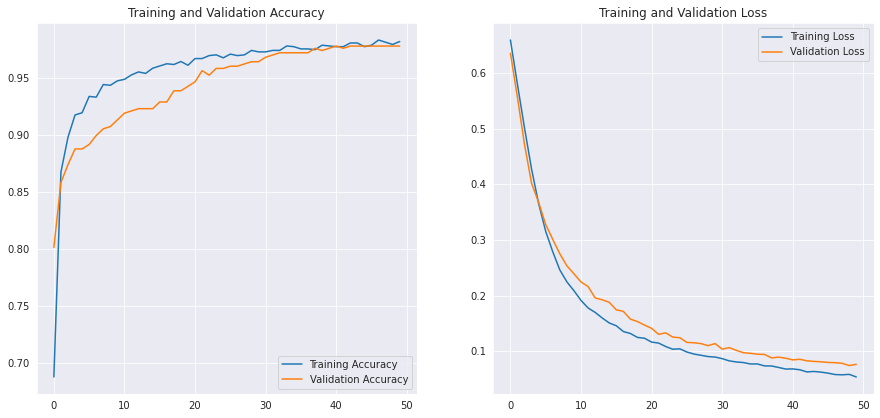

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
predictions = loaded_model.predict(x_val)
predictions = np.argmax(predictions, axis=1)
predictions = predictions.reshape(1,-1)[0]
print(predictions)
print(classification_report(y_val, predictions, target_names = ['Yes (Class 0)','Np (Class 1)']))

2022-11-20 13:23:29.089745: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 306475008 exceeds 10% of free system memory.


[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 

In [12]:
loaded_model_classification = keras.models.load_model("final_model_valid_mri_1")


1/1 [==============================] - 0s 316ms/step
[[1.00000e+00 7.00416e-12]]
[0]
Valid MRI Scan Image


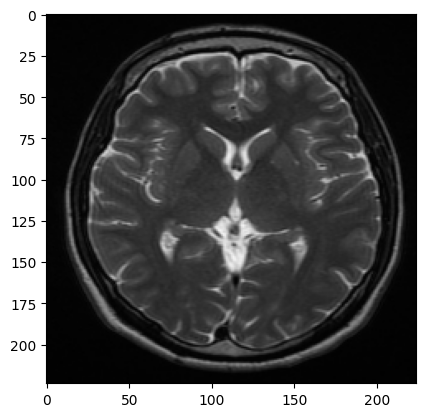

In [14]:
img = cv2.imread('Valid.jpg')[...,::-1] 
img_size = 224
resized_arr_img = cv2.resize(img, (img_size, img_size))
resized_arr = np.array(resized_arr_img) / 255

resized_arr = resized_arr.reshape(-1, img_size, img_size, 3)
predictions = loaded_model_classification.predict(resized_arr)
print(predictions)
predictions = np.argmax(predictions, axis=1)
predictions = predictions.reshape(1,-1)[0]

print(predictions)

plt.imshow(resized_arr_img)
if 0 in predictions :
    print("Valid MRI Scan Image")
else :
    print("Invalid MRI Scan Image")

1/1 [==============================] - 0s 44ms/step
[[2.6041062e-13 1.0000000e+00]]
[1]
Invalid MRI Scan Image


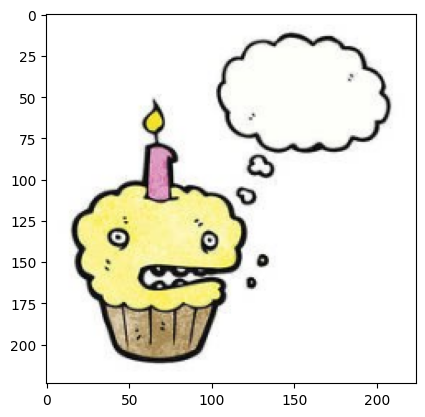

In [16]:
img = cv2.imread('Invalid.jpg')[...,::-1] 

resized_arr_img = cv2.resize(img, (img_size, img_size))
resized_arr = np.array(resized_arr_img) / 255

resized_arr = resized_arr.reshape(-1, img_size, img_size, 3)
predictions = loaded_model_classification.predict(resized_arr)
print(predictions)
predictions = np.argmax(predictions, axis=1)
predictions = predictions.reshape(1,-1)[0]

print(predictions)

plt.imshow(resized_arr_img)
if 0 in predictions :
    print("Valid MRI Scan Image")
else :
    print("Invalid MRI Scan Image")